# Tarea 4. Pandas Intermedio (yo no escogí el nombre)

🐼

1) Lee los datos la NBA includos dentro de la carpeta "Datos" adjunta en esta tarea.
* Crea un DataFrame donde filtres a todos los jugadores de la semana (MVP) del 2019 (usa la columna 'Season short' para no complicarte).

* Usa el método groupby() en tus datos filtrados para agruparlos por **conferencia** y **posición**. Usa el método count() para hacer un conteo sobre el número de MVP's que hubo por cada una de las posiciones de juego.

* Recicla tu código del inciso anterior y usa la función unstack para generar un DataFrame donde las columnas sean las posiciones de juego. Haz una gráfica de tus resultados. Tiene que verse más o menos como:

<img src="Imágenes/Tarea4-1.png" width="400"/> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_csv("Datos\\NBA_player_of_the_week.csv")

In [3]:
datos.head()

Active season                  Player                  Team Conference  \
0              0  Micheal Ray Richardson       New Jersey Nets        NaN   
1              0             Derek Smith  Los Angeles Clippers        NaN   
2              0             Calvin Natt        Denver Nuggets        NaN   
3              0     Kareem Abdul-Jabbar    Los Angeles Lakers        NaN   
4              0              Larry Bird        Boston Celtics        NaN   

           Date Position Height  Weight  Age  Draft Year  Seasons in league  \
0  Apr 14, 1985       PG    6-5     189   29        1978                  6   
1   Apr 7, 1985       SG    6-6     205   23        1982                  2   
2   Apr 1, 1985        F    6-6     220   28        1979                  5   
3  Mar 24, 1985        C    7-2     225   37        1969                 15   
4  Mar 17, 1985       SF    6-9     220   28        1978                  5   

      Season  Season short  Real_value  
0  1984-1985          1985         1.0  
1  1984-1985          1985         1.0  
2  1984-1985          1985         1.0  
3  1984-1985          1985         1.0  
4  1984-1985          1985         1.0

In [4]:
MVP_2019 = datos[datos['Season short'] == 2019]

In [5]:
MVP_2019.groupby(['Conference','Position'])[['Player']].count()

Player
Conference Position        
East       C              2
           F             11
           G              2
           PF             2
           PG             1
           SG             3
West       C              4
           F              1
           FC             1
           G              4
           GF             3
           PF             1
           PG             1
           SG             6

In [9]:
df_unstack=MVP_2019.groupby(['Conference','Position'])[['Player']].count().unstack(level=-1)
df_unstack

Player                                    
Position        C     F   FC    G   GF   PF   PG   SG
Conference                                           
East          2.0  11.0  NaN  2.0  NaN  2.0  1.0  3.0
West          4.0   1.0  1.0  4.0  3.0  1.0  1.0  6.0

In [10]:
plt.style.use('seaborn-pastel')

<Figure size 720x360 with 0 Axes>

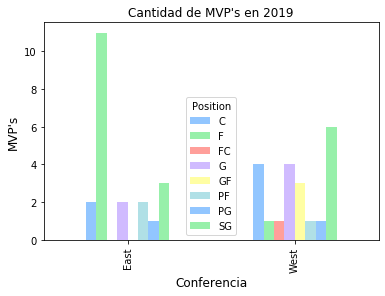

In [36]:
# Dataframe con unstack
# Crear gráfica
plt.figure(figsize=(10,5))
grafica=df_unstack.plot(kind='bar')
plt.xlabel("Conferencia", fontsize=12)
plt.ylabel("MVP's", fontsize=12)
plt.title("Cantidad de MVP's en 2019")
plt.yticks(fontsize=10)
plt.show()

2) Ahora haz la lectura de los datos sobre el carbono negro tambien includos dentro de la carpeta "Datos".

* Crea una variable nueva de día de la semana que vaya de [lunes-domingo](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.day_name.html).

* Agrupa por día de la semana y obten los valores máximos de carbono negro que se registraron por día. 

* Crea una columna de hora (sólo hora, no minutos, no segundos). Agrupa por hora, ¿a qué hora hay en promedio mayor carbono negro en el ambiente? ¿Hay algún insight que quieras hacer referencia? No olvides graficar. Deberías obtener algo como lo siguiente:
  
<img src="Imágenes/Tarea4-2.png" width="600"/> 
 
  **HINT**: Utiliza el método split() para eliminar la parte correspondiente a los minutos y los segundos de la columna "hora".

3) Grafica lo siguiente:

* Cantidad de valores nulos hay por columna.
* Cantidad de valores nulos hay por columna pero ahora en terminos porcentaje.
    
### **NO muestres las columnas que NO tengan valores nulos.**

4) Grafica el comportamiento del carbono negro por mes (tienes que crear la variable mes) y hora.

* ¿En qué mes mejoró la calidad del promedio del aire? 
    
* ¿Qué rango de horas es el ideal para hacer actividades al aire libre?

* Haz una gráfica que nos permita visualizar las respuestas de los dos incisos anteriores. Tu gráfica debe verse algo así:

<img src="Imágenes/Tarea4-3.png" width="600"/> 

5) Filtra los valores donde se tiene un valor de carbono negro mayor al cuantil 69. 
* ¿Cuál es el número de datos que perdiste?
* ¿Cuál es el porcentaje de datos que perdiste?
* Obten los histogramas de los datos con el filtro y sin el filtro. ¿Qué puedes decir al respecto de ellos?